# Natural Language Processing (NLP)
## Codementor Python Machine Learning Class 3

We'll now turn to machine learning applied to text, a.k.a. Natural Language Processing (NLP) or computational linguistics.  We'll use the Reddit 2015 comments dataset for our investigations.

Resources:

(1) Pandas has some useful, basic support for manipulating text.  
        http://pandas.pydata.org/pandas-docs/stable/text.html
        
(2) The Python Natural Language Tookit (nltk), which installed with Anaconda: 
        http://www.nltk.org/
        
(2.5) Spacy is becoming more popular for industrial use
        https://spacy.io/
        
(3) Reference and practice for Regular Expressions (regex): 
        http://regex.learncodethehardway.org/book/
        http://regexr.com/
        
(4) Gensim-- Python library for topic modeling which works alongside NLTK.  Website: https://radimrehurek.com/gensim/index.html
    You can install with the shell command (do it from your Anaconda directory if using windows):
    `python -m pip install gensim`
    

Scenario: Your company, a car manufacturer, wants to use social media to understand current trends in public interest and opinion.  What does the public think about the company's products?  Competitor's products?  You (a data scientist, software developer, or business analyst) have been picked as a team member due to your practical knowledge of machine-learning techniques. You decide to start with an analysis of Reddit comments.  For example: https://www.reddit.com/r/Toyota/   

WARNING: WE WILL BE WORKING WITH UNCENSORED COMMENTS POSTED IN A PUBLIC DISCUSSION FORUM.  SOME OF THESE COMMENTS MAY INCLUDE OFFENSIVE CONTENT.  NEITHER THE INSTRUCTOR NOR ANYONE AT CODEMENTOR CREATED ANY OF THE COMMENTS.  WE HAVE NOT SELECTED ANY OFFENSIVE COMMENTS TO SHOW IN THE CLASS.  OFFENSIVE COMMENTS WHICH MAY APPEAR ARE THE RESULT OF APPLYING ML-ALGORITHMS FOR THE PURPOSE OF TOPIC MODELING AND OPINION MINING.

In [102]:
%matplotlib inline
# allows plotting in cells, we'll use later on.
import pylab
pylab.rcParams['figure.figsize'] = (10, 6) # set a larger figure size

In [103]:
# Ford vs. Toyota
# Topic modeling (unsupervised learning)

In [104]:
import sqlite3
conn = sqlite3.connect('C:/Users/peter/Documents/Codementor/MLClass/data/reddit/database.sqlite')

In [105]:
import pandas

In [5]:
# List the tables in this database!

query = """
SELECT name from sqlite_master WHERE type='table';
"""
c = conn.cursor()
c.execute(query)
data = c.fetchall()  # you can also iterate over c e.g. for row in c: doStuff(data)
print data

[(u'May2015',)]


In [106]:
# List the fields in this table!
query = """
pragma table_info('May2015');
"""
c = conn.cursor()
c.execute(query)
data = c.fetchall()  # you can also iterate over c e.g. for row in c: doStuff(data)
print data

[(0, u'created_utc', u'INTEGER', 0, None, 0), (1, u'ups', u'INTEGER', 0, None, 0), (2, u'subreddit_id', u'', 0, None, 0), (3, u'link_id', u'', 0, None, 0), (4, u'name', u'', 0, None, 0), (5, u'score_hidden', u'', 0, None, 0), (6, u'author_flair_css_class', u'', 0, None, 0), (7, u'author_flair_text', u'', 0, None, 0), (8, u'subreddit', u'', 0, None, 0), (9, u'id', u'', 0, None, 0), (10, u'removal_reason', u'', 0, None, 0), (11, u'gilded', u'int', 0, None, 0), (12, u'downs', u'int', 0, None, 0), (13, u'archived', u'', 0, None, 0), (14, u'author', u'', 0, None, 0), (15, u'score', u'int', 0, None, 0), (16, u'retrieved_on', u'int', 0, None, 0), (17, u'body', u'', 0, None, 0), (18, u'distinguished', u'', 0, None, 0), (19, u'edited', u'', 0, None, 0), (20, u'controversiality', u'int', 0, None, 0), (21, u'parent_id', u'', 0, None, 0)]


In [107]:
query = """
SELECT subreddit,
    body,
    score
    FROM May2015
    WHERE subreddit = '{0}'
"""
# On Reddit, topics are called 'subreddits'
# https://www.reddit.com/r/Toyota/
# https://www.reddit.com/r/Ford/

df_ford = pandas.read_sql(query.format('Ford'), conn)
df_toyota =  pandas.read_sql(query.format('Toyota'), conn)

In [108]:
df_ford.head()

,subreddit,body,score
0,Ford,Yes a bit more definitely. I guess assume I'll...,1
1,Ford,No it's the tube for the intake from the inter...,1
2,Ford,Looks very similar to the Australian Ford Falc...,2
3,Ford,Very hard to find. I prefer them for their uni...,1
4,Ford,No way... you found a Ford in STL???,0


In [109]:
df_ford.describe()

,score
count,1471.000000
mean,1.822570
std,2.250426
min,-22.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,35.000000


In [110]:
df_toyota.head()

,subreddit,body,score
0,Toyota,What kind of truck? Is that the wrong question...,1
1,Toyota,"I'm a bit of a traitor here, but it's a Nissan...",1
2,Toyota,Those are a good truck though. I used to sell ...,1
3,Toyota,"Time can do as much damage as miles though, mo...",2
4,Toyota,"Not gonna lie, I hate it lol. It's more of a p...",1


In [111]:
df_toyota.describe()

,score
count,1094.000000
mean,1.739488
std,1.654171
min,-4.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,24.000000


In [12]:
# save out data frames so interested parties can skip the 30 GB database
# df_toyota.to_csv("C:/Users/peter/CM-ML-Class/3/data/toyota.csv", index=False, index_label=False, encoding='utf-8')
# df_ford.to_csv("C:/Users/peter/CM-ML-Class/3/data/ford.csv", index=False, index_label=False, encoding='utf-8')

In [12]:
# here's how to read csv's into a DataFrame:
df_toyota = pandas.read_csv("C:/Users/peter/Documents/Codementor/MLClass/data/reddit/toyota.csv")
df_ford = pandas.read_csv("C:/Users/peter/Documents/Codementor/MLClass/data/reddit/ford.csv")

In [13]:
df_toyota.head()

,subreddit,body,score
0,Toyota,What kind of truck? Is that the wrong question...,1
1,Toyota,"I'm a bit of a traitor here, but it's a Nissan...",1
2,Toyota,Those are a good truck though. I used to sell ...,1
3,Toyota,"Time can do as much damage as miles though, mo...",2
4,Toyota,"Not gonna lie, I hate it lol. It's more of a p...",1


In [112]:
df = pandas.concat([df_ford, df_toyota])

In [113]:
df.head()

,subreddit,body,score
0,Ford,Yes a bit more definitely. I guess assume I'll...,1
1,Ford,No it's the tube for the intake from the inter...,1
2,Ford,Looks very similar to the Australian Ford Falc...,2
3,Ford,Very hard to find. I prefer them for their uni...,1
4,Ford,No way... you found a Ford in STL???,0


In [17]:
df.tail()

,subreddit,body,score
1089,Toyota,I'm super excited to finally get it. For a co...,2
1090,Toyota,"If you're going to have to wait for delivery, ...",2
1091,Toyota,"Hey, I'm in a similar situation in looking to ...",1
1092,Toyota,http://www.crutchfield.com,1
1093,Toyota,If you upgrade the door speakers be sure to pu...,1


In [18]:
df.describe()

,score
count,2565.000000
mean,1.787135
std,2.017839
min,-22.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,35.000000


In [22]:
df.head()

,subreddit,body,score
0,Ford,Yes a bit more definitely. I guess assume I'll...,1
1,Ford,No it's the tube for the intake from the inter...,1
2,Ford,Looks very similar to the Australian Ford Falc...,2
3,Ford,Very hard to find. I prefer them for their uni...,1
4,Ford,No way... you found a Ford in STL???,0


# Sentiment analysis
VADER is a sentiment analyzer included with NLTK.  It scores sentences by bouncing key words and even emoticons against its dictionary.  It has a list of negation words, e.g. "not" to handle phrases like "not good".  It also has a "booster dictionary" of words e.g. "very" to handle phrase like "very good".  VADER does its own text pre-processing, so data prep not required when using VADER.  However, you may have to make changes to the source code if it doesn't do a good job in your text domain.

References:

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

Source code: http://www.nltk.org/_modules/nltk/sentiment/vader.html

In [34]:
from nltk.sentiment import vader

In [35]:
sia = vader.SentimentIntensityAnalyzer()

Let's try a few examples:

In [36]:
sia.polarity_scores("Worst car I ever drove.")

{'compound': -0.6249, 'neg': 0.577, 'neu': 0.423, 'pos': 0.0}

The 'compound' is the overall sentiment score, which can range from -1 to 1.

In [37]:
sia.polarity_scores("Worst car I ever drove. :)")

{'compound': -0.2732, 'neg': 0.406, 'neu': 0.297, 'pos': 0.297}

In [38]:
sia.polarity_scores("Best car I ever drove. :)")

{'compound': 0.802, 'neg': 0.0, 'neu': 0.294, 'pos': 0.706}

Let's score the entire data set:

_if you loaded your data from the csv's, some of the text will be of type int instead of str (not yet sure why). clean first with a cast (more general), or use _`polarity_scores(str(x))`:

In [39]:
df['cleaned_comment'] = df.body.apply(lambda x: str(x))
df['sentiment'] = df.cleaned_comment.apply(lambda x: sia.polarity_scores(x)['compound'])

_if you loaded from the database, you can operate directly on the comments:_

In [16]:
df['sentiment'] = df.body.apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [41]:
df.head()

,subreddit,body,score,cleaned_comment,sentiment
0,Ford,Yes a bit more definitely. I guess assume I'll...,1,Yes a bit more definitely. I guess assume I'll...,0.8755
1,Ford,No it's the tube for the intake from the inter...,1,No it's the tube for the intake from the inter...,-0.2973
2,Ford,Looks very similar to the Australian Ford Falc...,2,Looks very similar to the Australian Ford Falc...,0.0000
3,Ford,Very hard to find. I prefer them for their uni...,1,Very hard to find. I prefer them for their uni...,-0.1761
4,Ford,No way... you found a Ford in STL???,0,No way... you found a Ford in STL???,-0.4098


In [45]:
df.tail()

,subreddit,body,score,cleaned_comment,sentiment
1089,Toyota,I'm super excited to finally get it. For a co...,2,I'm super excited to finally get it. For a co...,0.7644
1090,Toyota,"If you're going to have to wait for delivery, ...",2,"If you're going to have to wait for delivery, ...",0.4939
1091,Toyota,"Hey, I'm in a similar situation in looking to ...",1,"Hey, I'm in a similar situation in looking to ...",0.7105
1092,Toyota,http://www.crutchfield.com,1,http://www.crutchfield.com,0.0000
1093,Toyota,If you upgrade the door speakers be sure to pu...,1,If you upgrade the door speakers be sure to pu...,0.8126


In [44]:
len(df)

2565

In [48]:
df.groupby(by='subreddit').mean()

,score,sentiment
subreddit,,
Ford,1.822570,0.254238
Toyota,1.739488,0.257686


And do a quick graphical comparison:

subreddit
Ford      Axes(0.125,0.125;0.775x0.775)
Toyota    Axes(0.125,0.125;0.775x0.775)
Name: sentiment, dtype: object

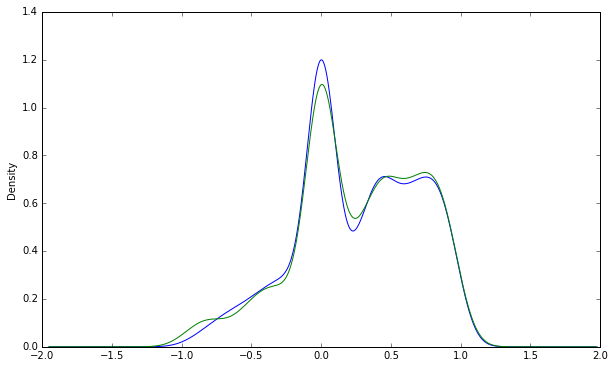

In [51]:
df.groupby(by='subreddit').sentiment.plot.kde()

In [53]:
pandas.set_option("display.max_columns",80)
df.loc[df.sentiment == 0].body.head(), df.loc[df.sentiment > 0.8].body.head(), df.loc[df.sentiment < -0.8].body.head()

(2     Looks very similar to the Australian Ford Falc...
 7                Did you notice the manufacturer plate?
 9     Call a wrecking yard to swap out motor. Should...
 11                                            [deleted]
 16    As someone who has worked for Ford, I know how...
 Name: body, dtype: object,
 0     Yes a bit more definitely. I guess assume I'll...
 37    I love seeing old cars that look like they jus...
 45    We must be opposites. Took me 6 months to find...
 46    I had a 99 expedition, finally sold it with 21...
 58    I'm running with a 2000 Focus SE and loving it...
 Name: body, dtype: object,
 6      Hey dick I wanted to read that. But your link ...
 412    My only complaint about the Thunderbird really...
 706    That makes no sense...I mean I like that he lo...
 730    Haven't yet, but I'm going to.  I am waiting o...
 766    Previous owner was a mechanic, 9 years of work...
 Name: body, dtype: object)

# Data prep: Tokenize, remove stop words, and stem.

# Tokenize
This means breaking documents into sentences and sentences into words.
What's the right tokenizer for our data?
See www.nltk.org/api/nltk.tokenize.html

In [54]:
# old school
x = "A very simple example."
x.split(' ')

['A', 'very', 'simple', 'example.']

In [55]:
x = df.iloc[222]['body']
x


'Gotta love Ford blue.'

In [56]:
x.split(' ')

['Gotta', 'love', 'Ford', 'blue.']

In [59]:
x = df.iloc[2224]['body']
x.split(' ')

['What',
 'did',
 'you',
 'have',
 'to',
 'do',
 'repair/maintenance',
 'wise',
 'during',
 'your',
 'ownership?']

In [57]:
import nltk
#nltk.download()
# http://www.nltk.org/data.html

In [58]:
from nltk.tokenize import word_tokenize

In [60]:
word_tokenize(x)

['What',
 'did',
 'you',
 'have',
 'to',
 'do',
 'repair/maintenance',
 'wise',
 'during',
 'your',
 'ownership',
 '?']

In [61]:
from nltk.tokenize import TreebankWordTokenizer

In [62]:
TreebankWordTokenizer().tokenize(x)

['What',
 'did',
 'you',
 'have',
 'to',
 'do',
 'repair/maintenance',
 'wise',
 'during',
 'your',
 'ownership',
 '?']

In [63]:
from nltk.tokenize import TweetTokenizer

In [64]:
TweetTokenizer().tokenize(x)

[u'What',
 u'did',
 u'you',
 u'have',
 u'to',
 u'do',
 u'repair',
 u'/',
 u'maintenance',
 u'wise',
 u'during',
 u'your',
 u'ownership',
 u'?']

In [65]:
df.iloc[1011]['body']

"Gm makes the Le Mans vette... That's super right? ;) "

In [66]:
x=df.iloc[1011]['body']

In [67]:
TweetTokenizer().tokenize(x)

[u'Gm',
 u'makes',
 u'the',
 u'Le',
 u'Mans',
 u'vette',
 u'...',
 u"That's",
 u'super',
 u'right',
 u'?',
 u';)']

In [68]:
TreebankWordTokenizer().tokenize(x)

['Gm',
 'makes',
 'the',
 'Le',
 'Mans',
 'vette',
 '...',
 'That',
 "'s",
 'super',
 'right',
 '?',
 ';',
 ')']

In [69]:
word_tokenize(x)

['Gm',
 'makes',
 'the',
 'Le',
 'Mans',
 'vette',
 '...',
 'That',
 "'s",
 'super',
 'right',
 '?',
 ';',
 ')']

Looks like the TweetTokenizer is best for our data!  If none of the tokenizers work well for your data, you can always create a custom tokenizer with regular expressions (regex or regexp).

In [71]:
from nltk.tokenize import RegexpTokenizer

In [72]:
regex_caps = '[A-Z]\w+' # capitalized words
regex_emotes = '(?::|;|=)(?:-)?(?:\)|\(|D|P)' # emoticons/smileys
tokenizer_caps = RegexpTokenizer(regex_caps)
tokenizer_emotes = RegexpTokenizer(regex_emotes)

In [73]:
tokenizer_caps.tokenize(x)

['Gm', 'Le', 'Mans', 'That']

In [74]:
tokenizer_emotes.tokenize(x)

[';)']

Let's put both of these together in our own custom tokenizer class.  The `__init__` method will create and store two `RegexpTokenizer` objects.  The `tokenize` method will run both regexp tokenizers and return all the results.

In [75]:
class CapsEmoteTokenizer(object):
    def __init__(self):
        regex_caps = '[A-Z]\w+' # capitalized words
        regex_emotes = '(?::|;|=)(?:-)?(?:\)|\(|D|P)' # emoticons/smileys
        self.tokenizer_caps = RegexpTokenizer(regex_caps)
        self.tokenizer_emotes = RegexpTokenizer(regex_emotes)
        return
    
    def tokenize(self, raw):
        caps = self.tokenizer_caps.tokenize(raw)
        emotes = self.tokenizer_emotes.tokenize(raw)
        answer = caps + emotes
        return answer
    

In [76]:
t = CapsEmoteTokenizer()
t.tokenize(x)

['Gm', 'Le', 'Mans', 'That', ';)']

# "Stop Word" removal
A "stop word" is a low-information content word such as "is", "and", "but", etc.  They occur frequently and add no value to the analysis.  Thus, it makes sense to remove them.  The exact list of stop words depends on the data and analysis.  NLTK provides a list of stopwords for starters.

In [77]:
from nltk.corpus import stopwords as stopwordfactory

In [78]:
stopwords = stopwordfactory.words('english')

In [79]:
type(stopwordfactory)

nltk.corpus.reader.wordlist.WordListCorpusReader

In [80]:
type(stopwords)

list

In [81]:
len(stopwords)

153

In [82]:
stopwords[0:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

In [83]:
x=df.iloc[1012]['body']
tokens = TweetTokenizer().tokenize(x)
tokens

[u'I',
 u'make',
 u'decent',
 u'money',
 u'for',
 u'just',
 u'coming',
 u'out',
 u'of',
 u'college',
 u'and',
 u"I've",
 u'got',
 u'a',
 u"'",
 u'14',
 u'Focus',
 u'Sport',
 u'...',
 u'now',
 u"I'm",
 u'looking',
 u'at',
 u'the',
 u'ST',
 u'with',
 u'hungry',
 u'eyes',
 u'lol']

#### We'll use a **list comprehension** to remove stopwords; here's a quick refresher.
See also: https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions

In [63]:
# list comprehension quick tutorial
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [64]:
mylist = []
for i in range(10):
    mylist.append(2*i)
mylist

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [66]:
[ 2*x for x in range(10)]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

You can also add a condition

In [67]:
[ 2*i for i in range(10) if i > 5]

[12, 14, 16, 18]

And use any data type:

In [68]:
names = ['Curly', 'Larry', 'Moe', 'Schemp']
[ name + ' is a stooge' for name in names]

['Curly is a stooge',
 'Larry is a stooge',
 'Moe is a stooge',
 'Schemp is a stooge']

#### Now back to our problem

Recipe for removing stopwords from a comment:
Use a list comprehension to cycle through our tokens (words) and create a list.  If the word is in the set of stopwords, don't add it to our list.

In [84]:
[t for t in tokens if t.lower() not in stopwords] # note we don't retain lower case as we need car models caps

[u'make',
 u'decent',
 u'money',
 u'coming',
 u'college',
 u"I've",
 u'got',
 u"'",
 u'14',
 u'Focus',
 u'Sport',
 u'...',
 u"I'm",
 u'looking',
 u'ST',
 u'hungry',
 u'eyes',
 u'lol']

We notice some unimport words for our application; let's add them to the stopwords list in memory.

In [85]:
stopwords += ["i've", "...", "i'm", ".", "'"]

In [86]:
len(stopwords)

158

In [87]:
tokens_stopped = [t for t in tokens if t.lower() not in stopwords]
tokens_stopped

[u'make',
 u'decent',
 u'money',
 u'coming',
 u'college',
 u'got',
 u'14',
 u'Focus',
 u'Sport',
 u'looking',
 u'ST',
 u'hungry',
 u'eyes',
 u'lol']

# Stemming
Often we'll want to only use some sort of root word-- or stem-- in our analysis.  For example, in our present problem, we might want 'selling' & 'sell' to be the same.  This process is called 'stemming'.  (A related but more fundamental mapping is called 'lemmatization'.) NLTK provides us with several stemming options. http://www.nltk.org/api/nltk.stem.html

In [88]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [89]:
porter.stem('selling')

u'sell'

In [90]:
porter.stem('sell')

u'sell'

In [91]:
[porter.stem(t) for t in tokens_stopped] # it messed with our car model name; we'll have to separate out before stemming

[u'make',
 u'decent',
 u'money',
 u'come',
 u'colleg',
 u'got',
 u'14',
 u'Focu',
 u'Sport',
 u'look',
 u'ST',
 u'hungri',
 u'eye',
 u'lol']

In [92]:
from nltk.stem.lancaster import LancasterStemmer
lanc = LancasterStemmer()

In [93]:
[lanc.stem(t) for t in tokens_stopped] # hungri eye or hungry ey lol, literally

[u'mak',
 u'dec',
 u'money',
 u'com',
 u'colleg',
 u'got',
 u'14',
 u'foc',
 u'sport',
 u'look',
 u'st',
 u'hungry',
 u'ey',
 u'lol']

In [94]:
from nltk.stem.snowball import EnglishStemmer
snow = EnglishStemmer()

In [95]:
[lanc.stem(t) for t in tokens_stopped]

[u'mak',
 u'dec',
 u'money',
 u'com',
 u'colleg',
 u'got',
 u'14',
 u'foc',
 u'sport',
 u'look',
 u'st',
 u'hungry',
 u'ey',
 u'lol']

# Now let's process all of our Reddit comments 
# for word analysis!
Proposed algorithm:
1. TweetTokenizer
2. Put caps words aside for safekeeping
3. Remove stop words from both
4. Porter stemmer on lowercase words
5. Add caps words back in

This seems to make sense for our current application. 
We can do some diagnostics, see what we get, then modify this algorithm if necessary.   

In [96]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords as StopwordFactory

class CarsDataPrepper:
    def __init__(self):
        self.porter = PorterStemmer()
        regex_caps = '[A-Z]\w+' # capitalized words
        self.tokenizer_caps = RegexpTokenizer(regex_caps)
        self.tokenizer_tweet = TweetTokenizer()
        self.stopwords = StopwordFactory.words('english')
        self.stopwords += ["i've", "...", "i'm", ".", "'", "it's", "/", ")", "(", "]",
                           "[", ",", "!", "?", '"', '-', ':', '*', 'deleted', "|", "^", "#"
                          ">", "<"]
        return
    
    def _tokenize(self, raw):
        caps = self.tokenizer_caps.tokenize(raw)
        allwords = self.tokenizer_tweet.tokenize(raw)
        lowers = [w for w in allwords if w not in caps]
        return caps, lowers
    
    def _removeStopwords(self, caps, lowers):
        lowers_stopped = [w for w in lowers if w.lower() not in self.stopwords]
        caps_stopped = [w for w in caps if w.lower() not in self.stopwords]
        return caps_stopped, lowers_stopped
    
    def prep(self, raw):
        caps, lowers = self._tokenize(raw)
        caps_stopped, lowers_stopped = self._removeStopwords(caps, lowers)
        lowers_stemmed = [self.porter.stem(word) for word in lowers_stopped]
        return caps_stopped + lowers_stemmed
    

In [97]:
prepper = CarsDataPrepper()

Let's test out our data prepper:

In [114]:
x = df.iloc[1012].body
x

u"I make decent money for just coming out of college and I've got a '14 Focus Sport.....now I'm looking at the ST with hungry eyes lol"

In [115]:
prepper.prep(x)

[u'Focus',
 u'Sport',
 u'ST',
 u'make',
 u'decent',
 u'money',
 u'come',
 u'colleg',
 u'got',
 u'14',
 u'look',
 u'hungri',
 u'eye',
 u'lol']

In [100]:
# note, prepper.prep is a function (method)
prepper.prep

<bound method CarsDataPrepper.prep of <__main__.CarsDataPrepper instance at 0x000000000DF82748>>

Let's apply the `prep` method to the entire DataFrame, processing all of our comments in one go.  As you can see, we get back a Series:

In [116]:
type(df_ford.body.apply(prepper.prep))

pandas.core.series.Series

We'll name this Series 'words' and tack it on to our DataFrame

In [117]:
df_ford['words'] = df_ford.body.apply(prepper.prep)
df_ford.head()

,subreddit,body,score,words
0,Ford,Yes a bit more definitely. I guess assume I'll...,1,"[Yes, Thanks, bit, definit, guess, assum, I'll..."
1,Ford,No it's the tube for the intake from the inter...,1,"[tube, intak, intercool, keep, eye, check, eng..."
2,Ford,Looks very similar to the Australian Ford Falc...,2,"[Looks, Australian, Ford, Falcon, similar, 2015]"
3,Ford,Very hard to find. I prefer them for their uni...,1,"[hard, find, prefer, uniqu]"
4,Ford,No way... you found a Ford in STL???,0,"[Ford, STL, way, found]"


In [118]:
df_toyota['words'] = df_toyota.body.apply(prepper.prep)
df_toyota.head()

,subreddit,body,score,words
0,Toyota,What kind of truck? Is that the wrong question...,1,"[kind, truck, wrong, question, >]"
1,Toyota,"I'm a bit of a traitor here, but it's a Nissan...",1,"[Nissan, Titan, bit, traitor, say, cheap]"
2,Toyota,Those are a good truck though. I used to sell ...,1,"[good, truck, though, use, sell]"
3,Toyota,"Time can do as much damage as miles though, mo...",2,"[Time, much, damag, mile, though, car, isn't, ..."
4,Toyota,"Not gonna lie, I hate it lol. It's more of a p...",1,"[gonna, lie, hate, lol, person, thing, though,..."


# Some basic word analysis
Now that our raw Reddit comments are processed, we can do some very basic but meaningful word counting.  This is a way of characterizing our data set.

In [119]:
listOfordWords = [w for comment in df_ford.words for w in comment]
listOfordWords[0:10]


[u'Yes',
 u'Thanks',
 u'bit',
 u'definit',
 u'guess',
 u'assum',
 u"I'll",
 u'never',
 u'one',
 u"can't"]

In [120]:
len(listOfordWords)

22797

Use Python's set data type to see size of the vocabulary:

In [121]:
len(set(listOfordWords))

4919

It's possible to 'histogram' words using NLTK's frequency distribution:

In [122]:
from nltk import FreqDist

In [123]:
fdist_ford = FreqDist(listOfordWords)

In [124]:
fdist_ford.most_common(30) # we can add to the stopwords at this point

[(u'car', 277),
 (u'get', 259),
 (u'like', 235),
 (u'one', 184),
 (u'look', 178),
 (u'would', 141),
 (u'go', 139),
 (u'new', 135),
 (u'truck', 120),
 (u'Ford', 118),
 (u'drive', 108),
 (u'work', 106),
 (u'year', 100),
 (u'think', 97),
 (u"don't", 94),
 (u'time', 91),
 (u'good', 91),
 (u'thing', 89),
 (u'use', 89),
 (u'much', 88),
 (u'see', 86),
 (u'make', 85),
 (u'know', 84),
 (u'want', 80),
 (u'love', 78),
 (u'realli', 78),
 (u'part', 74),
 (u'engin', 69),
 (u'$', 69),
 (u'got', 66)]

In [125]:
listOtoyWords = [w for comment in df_toyota.words for w in comment]
fdist_toyota = FreqDist(listOtoyWords)


In [126]:
fdist_toyota.most_common(20)

[(u'car', 245),
 (u'get', 175),
 (u'like', 166),
 (u'look', 135),
 (u'one', 127),
 (u'Toyota', 114),
 (u'drive', 105),
 (u'go', 104),
 (u'time', 91),
 (u'would', 89),
 (u'got', 73),
 (u'truck', 72),
 (u"don't", 72),
 (u'good', 72),
 (u'Corolla', 72),
 (u'use', 72),
 (u'realli', 67),
 (u'know', 67),
 (u'work', 61),
 (u'make', 61)]

# Digrams

A digram or bigram means two words which occur together.  NLTK has some functions to find and count them.

In [127]:
from nltk import collocations

In [128]:
c_ford = collocations.BigramCollocationFinder.from_words(listOfordWords)

In [129]:
c_ford.ngram_fd.most_common(20)

[((u'look', u'like'), 24),
 ((u"don't", u'know'), 23),
 ((u'sound', u'like'), 15),
 ((u'new', u'one'), 15),
 ((u'year', u'old'), 13),
 ((u'Focus', u'ST'), 12),
 ((u'brand', u'new'), 11),
 ((u'new', u'truck'), 11),
 ((u'feel', u'like'), 11),
 ((u'pretti', u'much'), 11),
 ((u'someth', u'like'), 10),
 ((u'post', u'r'), 10),
 ((u'get', u'one'), 9),
 ((u'look', u'good'), 9),
 ((u'make', u'sure'), 9),
 ((u"I'd", u'like'), 8),
 ((u'bodi', u'style'), 8),
 ((u'never', u'heard'), 8),
 ((u'r', u'ford'), 7),
 ((u'account', u'less'), 7)]

In [130]:
c_toyota = collocations.BigramCollocationFinder.from_words(listOtoyWords)
c_toyota.ngram_fd.most_common(20)

[((u'time', u'belt'), 22),
 ((u'look', u'like'), 12),
 ((u'sound', u'like'), 10),
 ((u'shift', u'point'), 10),
 ((u"don't", u'know'), 10),
 ((u'floor', u'mat'), 9),
 ((u'look', u'good'), 8),
 ((u'make', u'sure'), 8),
 ((u'Toyota', u'Corolla'), 8),
 ((u'find', u'one'), 8),
 ((u'use', u'car'), 7),
 ((u'head', u'unit'), 7),
 ((u'water', u'pump'), 7),
 ((u'seem', u'like'), 7),
 ((u'#', u'#'), 6),
 ((u"don't", u'think'), 6),
 ((u'need', u'replac'), 6),
 ((u"I'd", u'like'), 6),
 ((u'center', u'consol'), 6),
 ((u'fuel', u'economi'), 6)]

Already, we can see sense some differences between Ford and Toyota topics.  Now, on to some more sophisticated analyses.

# Clustering and TF-IDF
Term-frequency/inverse document frequency (TF-IDF): a measure of word importance in a particular document, relative to a document collection.  0 = appears in all documents. Higher = more important.

We'll use the gensim library to weight our terms with TFIDF, construct a "bag of words" or "sparse" vector model of Reddit comments, then cluster the comments.  We'll be able to see different groups of comments on similar subjects.

In [131]:
from gensim import corpora, models
import gensim

First, construct a dictionary of words.  We'll use our already-prepared data to make the dictionary.  It is a list of ID numbers and words.

In [132]:

dictionary = corpora.Dictionary(df_ford.words)
dictionary.items()

[(4043, u'Friday'),
 (1756, u'Sadly'),
 (4362, u'pardon'),
 (3079, u'mothbal'),
 (4413, u'cakeday'),
 (1972, u'demand'),
 (3778, u'bear'),
 (383, u'yellow'),
 (1860, u'poorli'),
 (628, u'Continental'),
 (4082, u'Relearn'),
 (4498, u'Power'),
 (2493, u'oper'),
 (2487, u'captain'),
 (120, u'hate'),
 (3256, u'giddi'),
 (3045, u'accur'),
 (4447, u'Everyone'),
 (1374, u'sorri'),
 (3339, u'Honda'),
 (4814, u'Watch'),
 (4715, u'85,000'),
 (3470, u'Mostly'),
 (1788, u'Ranger'),
 (1887, u'bike'),
 (91, u'swap'),
 (4506, u'80-90'),
 (1206, u'aux'),
 (4485, u'Mountune'),
 (3800, u'sway'),
 (1025, u'worth'),
 (3881, u'Euro'),
 (625, u'@'),
 (2096, u'digit'),
 (269, u'GT'),
 (350, u'everi'),
 (2658, u'risk'),
 (3776, u'void'),
 (3980, u'mouth'),
 (3439, u'voic'),
 (4064, u'relearn'),
 (1701, u'GF'),
 (2196, u'LittleHelperRobot'),
 (276, u'GA'),
 (1962, u'Henry'),
 (111, u'affect'),
 (2920, u'GM'),
 (519, u"isn't"),
 (4654, u'vast'),
 (2483, u'Dont'),
 (1419, u'four'),
 (125, u"we'll"),
 (4731, u'Gt

Notice, it has the expected length:

In [133]:
len(dictionary.items())

4919

Next, we'll need to build a numerical or vector representation of our Reddit comments. 
We start by replacing each word in a comment by its ID number, followed by the number of times it occurs in the comment.  
The dictionary object
we created has a method for this called `doc2bow`.

In [136]:
x = df_ford.words[196]
print x

[u'Mercury', u'Capri', u'Basically', u'four-ey', u'mustang', u'differ']


In [137]:
transformed_x = dictionary.doc2bow(x)
print transformed_x

[(387, 1), (657, 1), (1316, 1), (1317, 1), (1318, 1), (1319, 1)]


Do this for *all* the comments.  A collection of documents (Reddit comments in our case) is called a corpus.

In [138]:
corpus = [dictionary.doc2bow(comment) for comment in df_ford.words]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(3, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(45, 1), (46, 1), (47, 1), (48, 1)],
 [(39, 1), (49, 1), (50, 1), (51, 1)],
 [(52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1)],
 [(72, 1), (73, 1), (74, 1)],
 [(51, 1),
  (75, 1),
  (76, 1),
  (77, 2),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1)],
 [(86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (9

In [139]:
len(corpus)

1471

Now we use TFIDF to weight the words.  As it stands, the number next to each word is the number of times it occurs in the comment.  All we are doing is changing this number to measure the relative importance of the word in the corpus.  

In [140]:
tfidf = models.TfidfModel(corpus) 
type(tfidf)

gensim.models.tfidfmodel.TfidfModel

In [141]:
weighted_corpus = tfidf[corpus]

In [142]:
type(weighted_corpus)

gensim.interfaces.TransformedCorpus

Let's have a look, comparing the original word list, the encoded word list, and the tfidf-weighted word list:

In [151]:
docid=0
print df_ford.words[docid]
print  "------"
print corpus[docid]
print "------"
print weighted_corpus[docid]

[u'Yes', u'Thanks', u'bit', u'definit', u'guess', u'assum', u"I'll", u'never', u'one', u"can't", u'fulli', u'appreci', u'super', u'car', u'allur', u'lesson', u'man']
------
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]
------
[(0, 0.18692854984607543), (1, 0.2101542255948645), (2, 0.3834053890178462), (3, 0.20461577431262806), (4, 0.29880260006843207), (5, 0.10541880994605857), (6, 0.19082415903929253), (7, 0.22862604176604798), (8, 0.11862957214541292), (9, 0.18692854984607543), (10, 0.267904613402525), (11, 0.2811153756018794), (12, 0.3834053890178462), (13, 0.2527821253138988), (14, 0.23447280283728636), (15, 0.19503173750623828), (16, 0.19803636488914297)]


Finally, we'll fill in zeros for all the unused words in the vocabulary.  That will make each comment vector the size of the vocabulary, or, 

In [152]:
weighted_corpus[0]

[(0, 0.18692854984607543),
 (1, 0.2101542255948645),
 (2, 0.3834053890178462),
 (3, 0.20461577431262806),
 (4, 0.29880260006843207),
 (5, 0.10541880994605857),
 (6, 0.19082415903929253),
 (7, 0.22862604176604798),
 (8, 0.11862957214541292),
 (9, 0.18692854984607543),
 (10, 0.267904613402525),
 (11, 0.2811153756018794),
 (12, 0.3834053890178462),
 (13, 0.2527821253138988),
 (14, 0.23447280283728636),
 (15, 0.19503173750623828),
 (16, 0.19803636488914297)]

In [113]:
len(dictionary)

4919

We can put our documents together in a big numerical matrix.  In this representation, the documents are columns:

In [149]:
tfidf_matrix = gensim.matutils.corpus2dense(tfidf[corpus], len(dictionary)) # documents are columns
tfidf_matrix

array([[ 0.18692856,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.21015422,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38340539,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.51767004,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.56705111,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.5710367 ]], dtype=float32)

You will recognize the TFIDF weightings from our sample comment in the first (0th) column:

In [150]:
tfidf_matrix[:,0]  # bag-of words representation

array([ 0.18692856,  0.21015422,  0.38340539, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

### Document similarity - Bag of Words model

In [153]:
from gensim import corpora, models, similarities
import numpy as np

In [154]:
dictionary = corpora.Dictionary(df_ford.words)

In [155]:
corpus = [dictionary.doc2bow(doc) for doc in df_ford.words]

In [156]:
tfidf = models.TfidfModel(corpus=corpus, dictionary=dictionary) 

In [158]:
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=len(dictionary))

"Seed" document, arbitrarily chosen to be doc 5:

In [159]:
df_ford.words.iloc[5], df_ford.body.iloc[5]

([u'Look',
  u'Kuga',
  u'Midwest',
  u'closer',
  u'euro',
  u'rather',
  u'odd',
  u'sit',
  u'street'],
 u'Look closer, its a euro Kuga, rather odd for it to be sitting on a street in the Midwest.')

In [160]:
doc0 = tfidf[corpus[5]]
sim0 = index[doc0]  # similarity of doc #0 to all other docs
print doc0
print 
print sim0

[(52, 0.3231517402823827), (53, 0.3610688595375391), (54, 0.25462204816633066), (55, 0.28523462102722635), (56, 0.3989859787926955), (57, 0.28523462102722635), (58, 0.3388887666379005), (59, 0.3231517402823827), (60, 0.3989859787926955)]

[ 0.  0.  0. ...,  0.  0.  0.]


In [161]:
similars = np.argsort(-sim0)[:10] 
# top indices not counting itself.  
#Time taken can be reduced using bottleneck.partsort

In [162]:
similars

array([   5,  906,   50, 1003, 1071,  547,  550,  187,   14, 1083], dtype=int64)

In [163]:
df_ford.iloc[906].body

u'Literally across the street from where I sit now. It was a sad day here. '

In [164]:
df_ford.iloc[50].body

u"Modern escape isn't even actually an evolution of the older Escape. The model is of European origin, and called the Kuga. I imagine sales and reviews were better for the Kuga so they brought it stateside and renamed it the Escape. "

In [127]:
 print df_ford.iloc[[ 906,   50, 1003, 1071,  547,  550,  187,   14, 1083]]

     subreddit                                               body  score  \
906       Ford  Literally across the street from where I sit n...      1   
50        Ford  Modern escape isn't even actually an evolution...      5   
1003      Ford  Looking at it closer, I'm thinking it may be a...      1   
1071      Ford    I'd rather run errands in that than the Slocus       0   
547       Ford  Thanks everyone. We called the closer dealer a...      1   
550       Ford  Buy the parts. Look for same in the engine. R+...      4   
187       Ford  Looking clean.\n\n Are blue cars like a theme ...      6   
14        Ford  Aren't Kugas and Escapes the same thing?  Why ...      2   
1083      Ford  The car on the trailer? The one sitting next t...      1   

                                                  words  
906          [Literally, across, street, sit, sad, day]  
50    [Modern, Escape, European, Kuga, Kuga, Escape,...  
1003        [Looking, ZD, Fairlane, closer, think, may]  
1071   

# Latent Dirichlet Allocation (LDA)
"Latent Dirichlet allocation (LDA) is a topic model that generates topics based on word frequency from a set of documents. LDA is particularly useful for finding reasonably accurate mixtures of topics within a given document set."  Very nice information here: https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html

Note there is another completely different LDA-- "Linear Discriminant Analysis"-- which is a classification algorithm.

In [165]:
from gensim import corpora, models
import gensim

In [166]:
dictionary = corpora.Dictionary(df_ford.words)

In [167]:
# encode all comments = a corpus.  "Bag of Words"
corpus = [dictionary.doc2bow(comment) for comment in df_ford.words]
corpus_tfidf = tfidf[corpus]

In [168]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=5, id2word = dictionary, passes=10)

In [169]:
ldamodel.print_topics(num_topics=10, num_words=10)

[(0,
  u"0.004*car + 0.002*look + 0.002*love + 0.002*like + 0.002*make + 0.002*think + 0.002*pretti + 0.002*time + 0.002*Ford + 0.002*I'll"),
 (1,
  u'0.005*Thanks + 0.004*thank + 0.004*awesom + 0.003*one + 0.003*dealer + 0.002*get + 0.002*look + 0.002*would + 0.002*like + 0.002*truck'),
 (2,
  u'0.003*like + 0.003*nice + 0.003*car + 0.003*look + 0.003*get + 0.003*new + 0.002*see + 0.002*go + 0.002*know + 0.002*truck'),
 (3,
  u'0.003*Nice + 0.003*get + 0.003*Yes + 0.003*one + 0.002*truck + 0.002*though + 0.002*like + 0.002*look + 0.002*new + 0.002*Ford'),
 (4,
  u'0.003*car + 0.003*get + 0.002*like + 0.002*look + 0.002*one + 0.002*fiesta + 0.002*would + 0.002*new + 0.002*lot + 0.002*302')]

In [170]:
corpus_lda = ldamodel[corpus_tfidf]

In [172]:
corpus_lda[50], df_ford.body[50]

([(0, 0.039005760852642984),
  (1, 0.84223034733360469),
  (2, 0.040034147749831585),
  (3, 0.039175450981210946),
  (4, 0.039554293082709663)],
 u"Modern escape isn't even actually an evolution of the older Escape. The model is of European origin, and called the Kuga. I imagine sales and reviews were better for the Kuga so they brought it stateside and renamed it the Escape. ")

In [176]:
# compare to Toyota
dictionary = corpora.Dictionary(df_toyota.words)
corpus = [dictionary.doc2bow(comment) for comment in df_toyota.words]
tfidf = models.TfidfModel(corpus=corpus, dictionary=dictionary) 
corpus_tfidf = tfidf[corpus]
ldamodel = gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=4, id2word = dictionary, passes=20)
ldamodel.print_topics(num_topics=10, num_words=5)

[(0, u'0.003*get + 0.002*go + 0.002*like + 0.002*know + 0.002*:)'),
 (1, u'0.003*car + 0.003*like + 0.002*drive + 0.002*get + 0.002*one'),
 (2, u'0.003*car + 0.003*Nice + 0.002*Looks + 0.002*look + 0.002*pic'),
 (3, u'0.003*look + 0.003*truck + 0.002*car + 0.002*one + 0.002*Yeah')]

Visualization with the pyLDAvis package.  (It's also an R package)
Reference: https://github.com/cpsievert/LDAvis

In [177]:
import pyLDAvis, pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [178]:
pyLDAvis.gensim.prepare(ldamodel, corpus_tfidf, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      30.776847        1       1  0.041345  0.007350
0      24.650704        1       2 -0.015185 -0.013014
1      23.015665        1       3 -0.005649 -0.025925
3      21.556784        1       4 -0.020511  0.031590, topic_info=     Category      Freq        Term     Total  loglift  logprob
term                                                           
3052  Default  3.000000       Looks  3.000000  30.0000  30.0000
257   Default  1.000000      beauti  1.000000  29.0000  29.0000
4206  Default  3.000000         pic  3.000000  28.0000  28.0000
2113  Default  2.000000        Yeah  2.000000  27.0000  27.0000
3329  Default  5.000000        Nice  5.000000  26.0000  26.0000
992   Default  2.000000        head  2.000000  25.0000  25.0000
1595  Default  1.000000      wonder  1.000000  24.0000  24.0000
1829  Default  2.000000       supra  2.000000  23.0000  23.0000
821   Default  2.000000       Thank  2.000000  22.0000  22.0000
1553  Default  2.000000           r  2.000000  21.0000  21.0000
2001  Default  1.000000        luck  1.000000  20.0000  20.0000
2093  Default  1.000000       Great  1.000000  19.0000  19.0000
1862  Default  1.000000          Im  1.000000  18.0000  18.0000
1346  Default  5.000000       truck  5.000000  17.0000  17.0000
892   Default  2.000000        deal  2.000000  16.0000  16.0000
936   Default  1.000000       super  1.000000  15.0000  15.0000
1085  Default  3.000000          :)  3.000000  14.0000  14.0000
2699  Default  3.000000      pretti  3.000000  13.0000  13.0000
4032  Default  1.000000        piec  1.000000  12.0000  12.0000
2618  Default  3.000000        well  3.000000  11.0000  11.0000
1609  Default  1.000000        Good  1.000000  10.0000  10.0000
2795  Default  2.000000        last  2.000000   9.0000   9.0000
2631  Default  2.000000        sell  2.000000   8.0000   8.0000
2475  Default  2.000000        idea  2.000000   7.0000   7.0000
1470  Default  1.000000        care  1.000000   6.0000   6.0000
2768  Default  1.000000      pickup  1.000000   5.0000   5.0000
1258  Default  2.000000       peopl  2.000000   4.0000   4.0000
2719  Default  1.000000     cheaper  1.000000   3.0000   3.0000
2266  Default  1.000000         2wd  1.000000   2.0000   2.0000
3316  Default  1.000000       chanc  1.000000   1.0000   1.0000
...       ...       ...         ...       ...      ...      ...
1470   Topic4  0.779478        care  1.440935   0.9201  -6.8849
2475   Topic4  0.975096        idea  2.022497   0.8049  -6.6610
338    Topic4  0.600856       choic  1.144396   0.8902  -7.1452
2026   Topic4  1.044440       start  2.261206   0.7621  -6.5923
2575   Topic4  0.804196       paint  1.648772   0.8165  -6.8537
1346   Topic4  1.985580       truck  5.184114   0.5748  -5.9499
2331   Topic4  0.620679       hilux  1.201230   0.8742  -7.1127
2866   Topic4  2.066275        look  7.582262   0.2344  -5.9101
1437   Topic4  0.843630      happen  1.951510   0.6958  -6.8058
2631   Topic4  1.065188        sell  2.797377   0.5689  -6.5727
2430   Topic4  1.422920        good  5.001567   0.2774  -6.2831
1959   Topic4  0.918162  dealership  2.363450   0.5890  -6.7212
3153   Topic4  1.209877        nice  3.904832   0.3628  -6.4453
1222   Topic4  1.412501        love  5.341174   0.2044  -6.2904
1491   Topic4  1.609733         one  6.841010   0.0876  -6.1597
3963   Topic4  0.690973        inch  1.464269   0.7835  -7.0055
1162   Topic4  0.880037        cost  2.341253   0.5560  -6.7636
1270   Topic4  1.796728         car  9.399737  -0.1202  -6.0498
517    Topic4  1.099077      though  4.043164   0.2319  -6.5413
773    Topic4  1.085113        make  4.054848   0.2163  -6.5541
1843   Topic4  1.265847      Toyota  6.037225  -0.0277  -6.4001
1076   Topic4  1.139798        time  4.812622   0.0941  -6.5050
3331   Topic4  1.048087         use  3.963200   0.2044  -6.5888
4045   Topic4  1.322193        like  7.604608  -0

# Latent Semantic Indexing
Latent Semantic Indexing (LSI) is the equivalent of Principal Component Analysis (PCA) for documents.  

Recall that PCA transformed numerical data vectors into a new set of vectors.  The new set of vectors concentrated the numerical variation in the first component.  Then, it concentrated the next level of variation in the second component, and so forth.  In our college data set, we were able to use only the first two transformed components (instead of all 4) and get the same results as using all 4 un-transformed (original) components.

LSI tries to accomplish the same objective (dimensionality reduction) using two key ideas.
1.  Word collocation.  Certain words tend to appear together in the data set('fast car', 'nice car').  Then, there are independent collocations in the data set ('need part', 'less fuel').  If you view the collocations as "dimensions", or, "topics", you can imagine specifying "how much" of each kind a document contains.
2. Singular Value Decomposition (SVD).  This is a linear algebra technique which transforms a matrix into a new matrix of effective lower dimension.  It's the matrix analogue of fitting a line to a bunch of points.  LSI is essentially applying SVD to a document-term matrix.

In [179]:
dictionary = corpora.Dictionary(df_ford.words)
corpus = [dictionary.doc2bow(comment) for comment in df_ford.words]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
corpus_tfidf[0]

[(0, 0.18692854984607543),
 (1, 0.2101542255948645),
 (2, 0.3834053890178462),
 (3, 0.20461577431262806),
 (4, 0.29880260006843207),
 (5, 0.10541880994605857),
 (6, 0.19082415903929253),
 (7, 0.22862604176604798),
 (8, 0.11862957214541292),
 (9, 0.18692854984607543),
 (10, 0.267904613402525),
 (11, 0.2811153756018794),
 (12, 0.3834053890178462),
 (13, 0.2527821253138988),
 (14, 0.23447280283728636),
 (15, 0.19503173750623828),
 (16, 0.19803636488914297)]

In [180]:
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2) # initialize an LSI transformation
corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
lsi.print_topics(30)

[(0,
  u'0.217*"car" + 0.204*"get" + 0.195*"look" + 0.192*"like" + 0.175*"one" + 0.153*"new" + 0.138*"would" + 0.126*"go" + 0.121*"Thanks" + 0.119*"truck"'),
 (1,
  u'0.951*"Thanks" + 0.153*"man" + -0.062*"car" + 0.060*"appreci" + 0.054*"take" + 0.049*"pic" + 0.041*"Yeah" + 0.036*"took" + -0.032*"use" + 0.031*"let"')]

Now every document is represented as a two dimensional vector.  Let's look at document 0:

In [183]:
print corpus_lsi[0]
df_ford.words[0]

[(0, 0.15166527919601616), (1, 0.23472956682402318)]


[u'Yes',
 u'Thanks',
 u'bit',
 u'definit',
 u'guess',
 u'assum',
 u"I'll",
 u'never',
 u'one',
 u"can't",
 u'fulli',
 u'appreci',
 u'super',
 u'car',
 u'allur',
 u'lesson',
 u'man']

Let's make a plot

In [184]:
data = [{'x':corpus_lsi[i][0][1], 'y':corpus_lsi[i][1][1]} for i in range(len(corpus_lsi)) if corpus_lsi[i] != []]

In [185]:
data

[{'x': 0.15166527919601616, 'y': 0.23472956682402318},
 {'x': 0.11909693862262163, 'y': -0.018156749294236444},
 {'x': 0.050807412798384438, 'y': -0.0082817288766846766},
 {'x': 0.057035857122170436, 'y': 0.00086733542239528444},
 {'x': 0.068123258687234498, 'y': -0.01431096388283977},
 {'x': 0.014299053296301292, 'y': 3.055162926448574e-05},
 {'x': 0.045537740283185101, 'y': 0.0040869301286414342},
 {'x': 0.032637153067613001, 'y': -0.0086186749847193718},
 {'x': 0.049142192068194146, 'y': -0.0040730412012797658},
 {'x': 0.032374066802284697, 'y': -0.0081234786790881676},
 {'x': 0.073198130307559769, 'y': -0.012329217220022426},
 {'x': 0.18391962715668256, 'y': -0.026398359402066671},
 {'x': 0.059951550353795929, 'y': -0.0049418665101526281},
 {'x': 0.076343173229763375, 'y': -0.01192306901860498},
 {'x': 0.011691714141257751, 'y': -0.0012745866040014312},
 {'x': 0.14466805715147743, 'y': -0.025727460342546957},
 {'x': 0.075387852249469506, 'y': 0.0058423120721221725},
 {'x': 0.169020

In [186]:
lsi_df = pandas.DataFrame(data)

In [187]:
lsi_df.head()

,x,y
0,0.151665,0.234730
1,0.119097,-0.018157
2,0.050807,-0.008282
3,0.057036,0.000867
4,0.068123,-0.014311


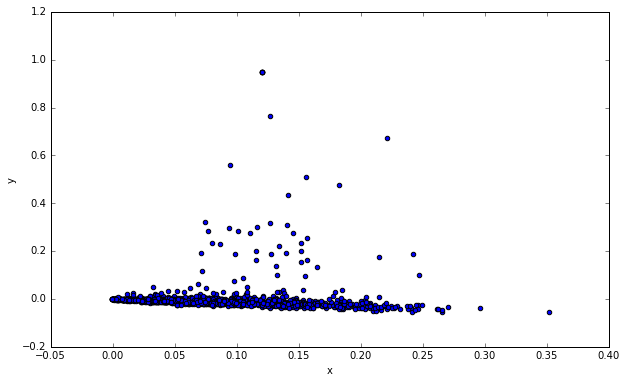

In [188]:
lsi_df.plot.scatter(x='x', y='y')

In [190]:
corpus = [dictionary.doc2bow(comment) for comment in df_toyota.words]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=4) # initialize an LSI transformation
corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
lsi.print_topics(4)

[(0,
  u'-0.236*"car" + -0.188*"look" + -0.183*"get" + -0.174*"like" + -0.167*"one" + -0.150*"Toyota" + -0.144*"drive" + -0.128*"go" + -0.120*"truck" + -0.114*"good"'),
 (1,
  u'0.899*"Nice" + 0.167*"pic" + -0.139*"Toyota" + 0.104*"truck" + 0.102*"one" + 0.102*"got" + 0.094*"love" + 0.076*"behind" + 0.066*"ride" + 0.053*"Looks"'),
 (2,
  u'0.841*"Toyota" + -0.204*"look" + 0.134*"Nice" + -0.127*"like" + 0.126*"love" + -0.084*"nice" + -0.084*"drive" + -0.075*"truck" + 0.073*"2003" + 0.072*"start"'),
 (3,
  u'0.783*"love" + -0.186*"Nice" + 0.138*"pic" + 0.101*"agre" + 0.095*"car" + -0.091*"Toyota" + 0.084*"interior" + -0.083*"time" + 0.079*"15" + -0.077*"go"')]

In [100]:
for doc in corpus_lsi[0:4]: 
    print (doc)

[(0, -0.065564302596982288), (1, 0.018365625681761904), (2, -0.0053696441030800235), (3, 0.055195557399478581)]
[(0, -0.039459212347970098), (1, -0.0019199817680356033), (2, 0.013970633425867622), (3, -0.0015775667385075293)]
[(0, -0.18099211850198388), (1, 0.015058364811425492), (2, -0.072614791114328087), (3, 0.17151735259700107)]
[(0, -0.12062792848167209), (1, -0.011089514165082397), (2, 0.036114455195307378), (3, 0.021770981450609253)]


### Gensim data structures summary
1. **`dictionary`**: key/map associating numerical ID with a single word.  Create with constructor passing all words
2. _**corpus**_: collection of documents, with words mapped to (id, freq) using `dictionary.doc2bow`
3. **`models.TfidfModel`**: contructed with _**corpus**_ and **`dictionary`**, a normalized TF-IDF weighting function. once you `tfidf = models.TfidfModel(corpus=corpus, dictionary=dictionary)`, then you can `tfidf[corpus[i]]` to get the [ (id, tfidf), ..., (id, tfidf) ] rep of the document.  You can also input custom local - global functions to get something other than tfidf.
4. _**index**_: a query engine to find the similarity of doc x with the rest of the corpus, or, all combinations (similarity matrix).  Use `similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=len(dictionary))` to create an in-memory, bag-of-words similarity engine.  Query doc n with `index[tfidf[corpus[n]]]`, returns an array of similarities.  You can also query a collection of docs, in which case you'll get a matrix back.  Aside: for LDA, `num_features` can be much smaller.  

From http://arxiv.org/pdf/1405.4053v2.pdf
Implemented in gensim


Many machine learning algorithms require the
input to be represented as a fixed-length feature
vector. When it comes to texts, one of the most
common fixed-length features is bag-of-words.
Despite their popularity, bag-of-words features
have two major weaknesses: they lose the ordering
of the words and they also ignore semantics
of the words. For example, “powerful,” “strong”
and “Paris” are equally distant. In this paper, we
propose Paragraph Vector, an unsupervised algorithm
that learns fixed-length feature representations
from variable-length pieces of texts, such as
sentences, paragraphs, and documents. Our algorithm
represents each document by a dense vector
which is trained to predict words in the document.
Its construction gives our algorithm the
potential to overcome the weaknesses of bag-ofwords
models. Empirical results show that Paragraph
Vectors outperform bag-of-words models
as well as other techniques for text representations.
Finally, we achieve new state-of-the-art results
on several text classification and sentiment
analysis tasks.

http://rare-technologies.com/doc2vec-tutorial/

The tutorial is slightly outdated.
The input to Doc2Vec is an iterator of TaggedDocument objects (it was formerly LabeledSentence objects).  From the source code:

_A single document, made up of `words` (a list of unicode string tokens)
and `tags` (a list of tokens). Tags may be one or more unicode string
tokens, but typical practice (which will also be most memory-efficient) is
for the tags list to include a unique integer id as the only tag._

To construct a TaggedDocument use: `td = TaggedDocument({'words': ['i'm','a','document'], 'tags': id})`

The algorithm then runs through the sentences iterator twice: once to build the vocab, and once to train the model on the input data, learning a vector representation for each word and for each label in the dataset.

Doc2Vec learns representations for words and labels simultaneously. If you wish to only learn representations for words, you can use the flag train_lbls=False in your Doc2Vec class. Similarly, if you only wish to learn representations for labels and leave the word representations fixed, the model also has the flag train_words=False.

The usage for Doc2Vec is the same as for gensim’s Word2Vec.

In [189]:
from gensim.models import doc2vec

class DocIterator(object):
    """ supply a list of dictionaries of doc and unique id: [ {'doc': list of words, 'id': id}, ... ]"""
    def __init__(self, doc_dict):
        self.doc_dict = doc_dict
    def __iter__(self):
        for item in self.doc_dict:
            yield doc2vec.TaggedDocument(words = item['doc'], tags=item['id'])

In [190]:
x = zip(range(len(df_ford.words)), df_ford.words)
d2v_input = [{'id':[a], 'doc':b} for a,b in x]
d2v_input[0:3]

[{'doc': [u'Yes',
   u'Thanks',
   u'bit',
   u'definit',
   u'guess',
   u'assum',
   u"I'll",
   u'never',
   u'one',
   u"can't",
   u'fulli',
   u'appreci',
   u'super',
   u'car',
   u'allur',
   u'lesson',
   u'man'],
  'id': [0]},
 {'doc': [u'tube',
   u'intak',
   u'intercool',
   u'keep',
   u'eye',
   u'check',
   u'engin',
   u'light',
   u'good',
   u'boost',
   u'leak',
   u"you'd",
   u'get',
   u'p0299',
   u'underboost',
   u'code',
   u'well',
   u'littl',
   u'bit',
   u'turbo',
   u'whistl',
   u'normal',
   u'mayb'],
  'id': [1]},
 {'doc': [u'Looks', u'Australian', u'Ford', u'Falcon', u'similar', u'2015'],
  'id': [2]}]

In [191]:
di = DocIterator(d2v_input)

In [192]:
model = doc2vec.Doc2Vec(size=40, window=5, min_count=2, workers=4, alpha=0.025, min_alpha=0.025)

In [193]:
model.build_vocab(di)

In [194]:
model.corpus_count, model.vector_size

(1471, 40)

In [195]:
for epoch in range(10):
    model.train(di)
    model.alpha -= 0.002 # decrease the learning rate
    model.min_alpha = model.alpha # fix the learning rate, no deca
    model.train(di)

In [196]:
model.total_train_time

7.10096492734726

In [197]:
model.docvecs[0]  # vector of doc 0

array([-0.27890411,  0.19033226,  0.00141543,  0.45811015,  0.29215679,
        0.33846655,  0.41683891, -0.02408137, -0.16166569, -0.39886433,
        0.54219741,  0.2126378 ,  0.10645349,  0.16495803, -0.12121289,
       -0.10408807,  0.13989155,  0.02410652, -0.93615115, -0.01702536,
       -0.04492405,  0.05511464, -0.03433079,  0.24332173,  0.18491834,
       -0.28718883,  0.53923023, -0.19012827,  0.39203432,  0.28407258,
       -0.06538004, -0.13175228, -0.1554634 ,  0.0189895 ,  0.36526206,
        0.67324197,  0.06850521, -0.15726721, -0.04764609, -0.14162523], dtype=float32)

In [198]:
model.docvecs.most_similar(0)

[(1296, 0.4819241464138031),
 (279, 0.44254404306411743),
 (1291, 0.4229709506034851),
 (903, 0.420285165309906),
 (146, 0.4109482765197754),
 (1283, 0.4066241383552551),
 (1118, 0.3885999321937561),
 (990, 0.3818693161010742),
 (991, 0.37134018540382385),
 (998, 0.36682093143463135)]

In [199]:
df_ford.body[0]

u"Yes a bit more definitely. I guess assume I'll never own one so can't fully appreciate the super car allure. Thanks for the lesson man."

In [200]:
print df_ford.body[1296]

Maybe I can haul my 2015 Torino to car shows...........in a trailer pulled by my 2015 Bronco!!!!  But unfortunately not :(


In [201]:
print df_ford.body[1291]

I've never heard or seen this rumor....and those pics are obviously photoshopped so why they be Trollin


In [202]:
df_ford.body[279]

u'I see the 2.7l able to make near 400hp soon. The 3.5l will be moving up in power'